# Bandy_DataManipulation.ipynb

###  Howard Bandy
###  home/howard/ProjectsDirectory/Manning_DataManipulation

## Part 1 -- Form a weekly time series

### Objective

- You are given a dataset of hotel booking entries. The original dataset by Antonio, Almeida and Nunes (2019) is available below. The dataset contains an IsCanceled variable (1 = customer cancels their booking, 0 = customer does not cancel their booking).

- The dataset contains numerous cancellation entries across the same time period. Your objective is to manipulate this dataset to form a time series of aggregate cancellations per week.

### Workflow

Load the dataset and use pandas to obtain the sum of cancellation entries by week, for example form a new time series which contains the total number of cancellations per week.

### Deliverable

The deliverable for this project is a Jupyter Notebook outlining the following:

A newly formed weekly time series aggregating the total number of cancellations per week. 


In [1]:
import pandas as pd
print ('pandas version: ', pd.__version__)

pandas version:  1.2.3


In [2]:
working_directory = '/home/howard/ProjectsDirectory/Manning_DataManipulation'
H1 = pd.read_csv(working_directory+'/H1.csv')
print (H1.head())
print (H1.tail())
print ('H1 is of type: ', type(H1))

   IsCanceled  LeadTime  ArrivalDateYear ArrivalDateMonth  \
0           0       342             2015             July   
1           0       737             2015             July   
2           0         7             2015             July   
3           0        13             2015             July   
4           0        14             2015             July   

   ArrivalDateWeekNumber  ArrivalDateDayOfMonth  StaysInWeekendNights  \
0                     27                      1                     0   
1                     27                      1                     0   
2                     27                      1                     0   
3                     27                      1                     0   
4                     27                      1                     0   

   StaysInWeekNights  Adults  Children  ...      DepositType        Agent  \
0                  0       2         0  ...  No Deposit              NULL   
1                  0       2         0  

In [3]:
print (H1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40060 entries, 0 to 40059
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   IsCanceled                   40060 non-null  int64  
 1   LeadTime                     40060 non-null  int64  
 2   ArrivalDateYear              40060 non-null  int64  
 3   ArrivalDateMonth             40060 non-null  object 
 4   ArrivalDateWeekNumber        40060 non-null  int64  
 5   ArrivalDateDayOfMonth        40060 non-null  int64  
 6   StaysInWeekendNights         40060 non-null  int64  
 7   StaysInWeekNights            40060 non-null  int64  
 8   Adults                       40060 non-null  int64  
 9   Children                     40060 non-null  int64  
 10  Babies                       40060 non-null  int64  
 11  Meal                         40060 non-null  object 
 12  Country                      39596 non-null  object 
 13  MarketSegment   

In [4]:
S = H1['ArrivalDateWeekNumber'].astype(str) 
# print (S)
S = '0' + S
Right = S.str[-2:]
# print (Right)
H1['strwn'] = Right
H1['stryr'] = H1['ArrivalDateYear'].astype(str)
H1['stryd'] = H1['stryr'] + H1['strwn']
    
print (H1.head())
print (H1.info())

   IsCanceled  LeadTime  ArrivalDateYear ArrivalDateMonth  \
0           0       342             2015             July   
1           0       737             2015             July   
2           0         7             2015             July   
3           0        13             2015             July   
4           0        14             2015             July   

   ArrivalDateWeekNumber  ArrivalDateDayOfMonth  StaysInWeekendNights  \
0                     27                      1                     0   
1                     27                      1                     0   
2                     27                      1                     0   
3                     27                      1                     0   
4                     27                      1                     0   

   StaysInWeekNights  Adults  Children  ...  DaysInWaitingList CustomerType  \
0                  0       2         0  ...                  0    Transient   
1                  0       2        

In [5]:
H1Grouped = H1.groupby('stryd',as_index=False)['IsCanceled'].sum()
# print (H1Grouped.head())
# print (H1Grouped.info())
# print ('----------')
H1Grouped.columns = ['Date (Year and Week Number)', 'IsCanceled']
print (H1Grouped.head())

  Date (Year and Week Number)  IsCanceled
0                      201527          41
1                      201528          48
2                      201529          87
3                      201530          74
4                      201531         101


In [6]:
H1Grouped.set_index(['Date (Year and Week Number)'])

,IsCanceled
Date (Year and Week Number),
201527,41
201528,48
201529,87
201530,74
201531,101
...,...
201731,173
201732,140
201733,182


In [7]:
print (H1Grouped.head(40))

   Date (Year and Week Number)  IsCanceled
0                       201527          41
1                       201528          48
2                       201529          87
3                       201530          74
4                       201531         101
5                       201532          68
6                       201533          96
7                       201534          69
8                       201535          88
9                       201536         148
10                      201537          76
11                      201538         186
12                      201539         123
13                      201540          91
14                      201541         198
15                      201542          16
16                      201543          94
17                      201544          44
18                      201545          45
19                      201546          54
20                      201547          63
21                      201548          18
22         

### Deliverable

The deliverable for this project is a Jupyter Notebook outlining the following:

A newly formed weekly time series aggregating the total number of cancellations per week. 

### Importance to the project

In addition, the newly formed time series in this milestone will be used as the basis for running further modeling techniques in the subsequent milestones.

In [8]:
print ('All done with Part 1')
print ('\n*******************************************************\n')


All done with Part 1

*******************************************************



## Part 2 -- Time series components

### Objective

Remember the weekly time series that you formed in Milestone 1? We would like to understand a bit more about this time series.

There are certain aspects of a time series that cannot necessarily be gleaned from simply “eye-balling” a plot of the series.

Your objectives in this milestone are the following:
- Decompose the time series and plot its components.
- Generate autocorrelation and partial autocorrelation plots for the time series.
- Calculate a 4-week moving average on the time series and plot this moving average against the actual time series. Note that the selection of a 4-week moving average is arbitrary. It is used in this case to give a better visual idea of the longer-term trend.

### Workflow

1. Decompose the time series and plot the trend, residual and seasonal components.

2. Generate separate plots for the values of acf and pacf using statsmodels.

3. Use pandas to calculate a 4-period SMA and plot this against the actual time series.

4. Split the time series into training and test partitions. Allocate 90% of the data to the training set and 10% to the test set.

### Deliverable

The deliverable for this project is a Jupyter Notebook outlining the following:

1. Decomposition of the time series, and plots of the trend, residual, and seasonal components
2. Autocorrelation and partial autocorrelation plots of the time series
3. A 4-period SMA plotted against the actual time series
4. 90/10 train-test split


In [9]:
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels import tsa

In [10]:
series = pd.Series(H1Grouped.IsCanceled)
print (series)
series.describe()

0       41
1       48
2       87
3       74
4      101
      ... 
110    173
111    140
112    182
113    143
114    100
Name: IsCanceled, Length: 115, dtype: int64


count    115.000000
mean      96.713043
std       45.865510
min       14.000000
25%       64.000000
50%       95.000000
75%      127.500000
max      222.000000
Name: IsCanceled, dtype: float64

<AxesSubplot:>

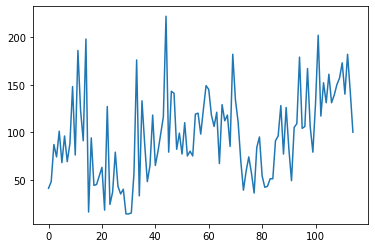

In [11]:
series.plot()

In [12]:
nlags=40
acf = (tsa.stattools.acf(series,nlags=nlags,fft=False))
print (acf)
acf.shape

[ 1.          0.36055904  0.43832205  0.40127022  0.22826716  0.24918724
  0.15101187  0.18028853  0.24989161  0.15601839  0.07915897  0.23154771
 -0.0169825  -0.01466523 -0.0033419  -0.08290528 -0.01984712 -0.135677
 -0.12177448 -0.03335962 -0.17835337 -0.13422302 -0.03268604 -0.07548972
 -0.0421531  -0.04994595 -0.10848361 -0.07935225 -0.14858541 -0.21920401
 -0.07485366 -0.1276737  -0.08496734 -0.06135381 -0.0346665  -0.02197916
 -0.03738199 -0.0693973  -0.05242808 -0.10479092 -0.05708971]


(41,)

In [13]:
x = np.arange(0,nlags+1)
print (x)
x.shape

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40]


(41,)

In [14]:
y = acf
print (y)
y.shape

[ 1.          0.36055904  0.43832205  0.40127022  0.22826716  0.24918724
  0.15101187  0.18028853  0.24989161  0.15601839  0.07915897  0.23154771
 -0.0169825  -0.01466523 -0.0033419  -0.08290528 -0.01984712 -0.135677
 -0.12177448 -0.03335962 -0.17835337 -0.13422302 -0.03268604 -0.07548972
 -0.0421531  -0.04994595 -0.10848361 -0.07935225 -0.14858541 -0.21920401
 -0.07485366 -0.1276737  -0.08496734 -0.06135381 -0.0346665  -0.02197916
 -0.03738199 -0.0693973  -0.05242808 -0.10479092 -0.05708971]


(41,)

In [15]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

<AxesSubplot:>

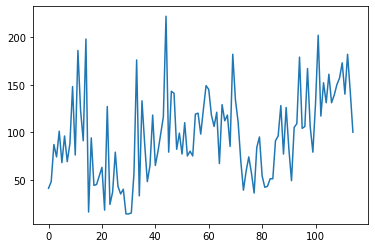

In [16]:
series.plot()

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
110   NaN
111   NaN
112   NaN
113   NaN
114   NaN
Name: resid, Length: 115, dtype: float64
[        nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan -30.6871875 -40.3434375  19.3065625 -40.7746875
  -9.7684375 -21.5871875 -31.6684375 -39.7871875 -21.3121875 -82.3309375
 -57.8246875 -45.6996875  -3.6184375  72.1190625  -7.7121875  35.4690625
  20.4815625  10.8253125  -5.1871875  14.1753125   6.5378125  19.3315625
  27.9315625  32.7190625  85.5190625  -5.8809375  23.1940625   5.4940625
   1.2315625 -15.8496875  -7.0621875  25.5128125 -19.7871875 -17.1621875
 -53.0621875  -3.4684375  -3.4684375  -3.4684375  -3.4684375  -3.4684375
  23.7503125  33.4065625 -26.2434375  33.8378125   2.8315625  14.6503125
  24.7315625  32.8503125  14.3753125  75.39406

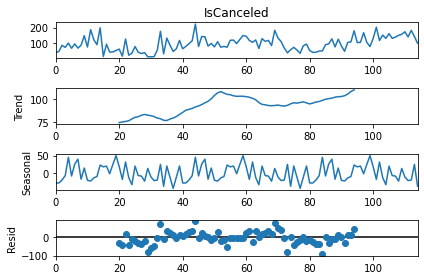

In [17]:
result_add = seasonal_decompose(series, model='additive', period=40)
result_add.plot()
print (result_add.resid)
type(result_add)
npresid = np.array(result_add.resid)
print (npresid[0:114])

### My specialty is forecasting financial series one day ahead.

### IMO ARIMA and its kin are not useful for forecasting.

Using a value of 40 periods introduces a lag of 20 weeks
due to the centering of the moving average.  
This makes any forecast earlier than weeknumber + 20 
impossible.
ARIMA and kin are valuable to explain,
but are not practical for forecasting.
A better approach for my work is to detrend using a 
dynamic moving average, such as exponential or adaptive.  
If there are enough complete cycles in the data
(there are only two annual cycles in this data),
remove them using trigonometric or low degree spline
approximations.
Then normalize the residuals and feed the machine learning
model.

### Adjust length of 'period' to observe results

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
110   NaN
111   NaN
112   NaN
113   NaN
114   NaN
Name: resid, Length: 115, dtype: float64
[        nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan -30.6871875 -40.3434375  19.3065625 -40.7746875
  -9.7684375 -21.5871875 -31.6684375 -39.7871875 -21.3121875 -82.3309375
 -57.8246875 -45.6996875  -3.6184375  72.1190625  -7.7121875  35.4690625
  20.4815625  10.8253125  -5.1871875  14.1753125   6.5378125  19.3315625
  27.9315625  32.7190625  85.5190625  -5.8809375  23.1940625   5.4940625
   1.2315625 -15.8496875  -7.0621875  25.5128125 -19.7871875 -17.1621875
 -53.0621875  -3.4684375  -3.4684375  -3.4684375  -3.4684375  -3.4684375
  23.7503125  33.4065625 -26.2434375  33.8378125   2.8315625  14.6503125
  24.7315625  32.8503125  14.3753125  75.39406

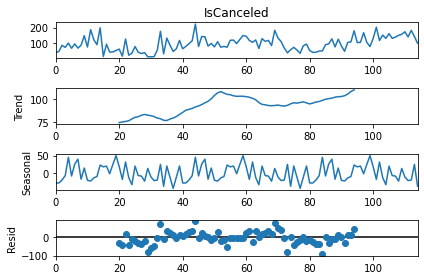

In [18]:
result_add = seasonal_decompose(series, model='additive', period=40)
result_add.plot()
print (result_add.resid)
type(result_add)
npresid = np.array(result_add.resid)
print (npresid[0:114])
npresidmean = np.nanmean(npresid)
print (npresidmean)
npresidnan = npresid[np.logical_not(np.isnan(npresid))]
print (npresidnan)
npresidnanmean = np.mean(npresidnan)
print (npresidnanmean)

In [19]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())
rmse40 = rmse(npresidnan,npresidnanmean)
print (rmse40)

#b = a[numpy.logical_not(numpy.isnan(a))] 

33.33937515036337


### Calculate the 4 period moving average of IsCanceled 

In [20]:
# IsCanceled data is currently in the 'series' variable
print (type(series))

<class 'pandas.core.series.Series'>


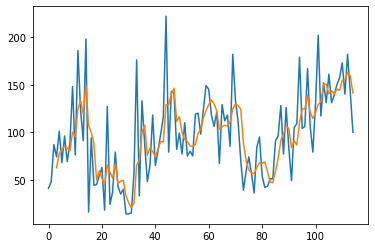

In [21]:
series_sma = series.rolling(4).mean()
series.plot()
series_sma.plot()
plt.show()

### Split the data into a 90/10 train/test split

In [22]:
#  Using the scikit-learn train_test_split routine

from sklearn.model_selection import train_test_split

In [23]:
train, test = train_test_split(series, test_size=0.10, shuffle=False)
print (series.shape)
print (train.shape, test.shape)

(115,)
(103,) (12,)


### Since this is a time series, it is important that the test data occurs later than the train data.  We can make that explicit by splitting manually using the index of the series.

In [24]:
series_length = len(series)
print (f'series length is: {series_length}')

series length is: 115


In [25]:
split_point = int(0.90 * series_length)
print (f'use the data up to position {split_point} as the train set')


use the data up to position 103 as the train set


In [26]:
train = series[:split_point]
test = series[split_point:]

length_train = len(train)
length_test = len(test)

print (f'length of train portion: {length_train}')
print (f'length of test portion:  {length_test}')


length of train portion: 103
length of test portion:  12


In [27]:
print (series.head())
print (series.tail())
print (train.head())
print (train.tail())
print (test.head())
print (test.tail())

0     41
1     48
2     87
3     74
4    101
Name: IsCanceled, dtype: int64
110    173
111    140
112    182
113    143
114    100
Name: IsCanceled, dtype: int64
0     41
1     48
2     87
3     74
4    101
Name: IsCanceled, dtype: int64
98     106
99      79
100    130
101    202
102    117
Name: IsCanceled, dtype: int64
103    152
104    131
105    161
106    131
107    139
Name: IsCanceled, dtype: int64
110    173
111    140
112    182
113    143
114    100
Name: IsCanceled, dtype: int64


In [28]:
print ('All done with Part 2')
print ('\n*******************************************************\n')


All done with Part 2

*******************************************************



## Part 3 -- Forecast weekly hotel cancelations with an ARIMA Model

### Objective

Remember the weekly time series that you formed in Milestone 1? Your objective is to train an ARIMA model using this newly formed time series to forecast weekly cancellations for the hotel.

### Workflow

1. Use pmdarima to train a model on the training data and select a model of best fit based on the Bayesian Information Criterion (BIC). The lower the BIC, the higher the fit. Make sure to identify an appropriate seasonal factor when configuring the model (Hint: Use the autocorrelation function to aid you in doing this).
2. Calculate the root mean squared error for the predictions versus the actual number of cancellations in the test set. Compare the RMSE value to the mean number of cancellations across the test set.

### Deliverable

The deliverable for this project is a Jupyter Notebook outlining the following:

1. Configuration of an ARIMA model using pmdarima, with the model of best fit ranked according to the Bayesian Information Criterion (BIC).

2. Calculation of model accuracy against the test set using RMSE.


In [29]:
import pmdarima as pm
#from pmdarima import model_selection


In [30]:
model = pm.auto_arima(train, 
                      seasonal=True,
                      m=12 )

In [31]:
pred = model.predict(n_periods=length_test)

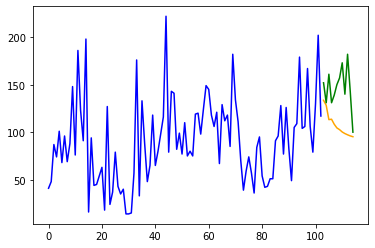

In [32]:
x = np.arange(0,series_length)

plt.plot(x[:split_point],train,c='blue')
plt.plot(x[split_point:],pred,c='orange')
plt.plot(x[split_point:],test,c='green')
plt.show()

### IMO, this data set is a poor choice to illustrate ARIMA and seasonality.
### It is not stationary, and differencing does not help.
### It does not show visual seasonality.
### The train set is two years of weekly data.  Some of the weekly data is one data point, others is summary.
### The test data set is 13 weeks -- too short to gain much insight.


In [33]:
print ('all done with Part 3')

all done with Part 3
